Mounted at /content/drive


In [ ]:
!pip install pytorch-hed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytorch-hed: filename=pytorch_hed-0.5-py3-none-any.whl size=6477 sha256=287f6d4ad41cfb96771703cdff1c270c3524724085777d38dbf966684693f801
  Stored in directory: /root/.cache/pip/wheels/74/a9/9b/902b464f531456b792121af481504c707146cc454c71213618
Successfully built pytorch-hed


In [ ]:
!pip install git+https://github.com/Davidelanz/pytorch-hed.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Davidelanz/pytorch-hed.git to /tmp/pip-req-build-2o9lj8mc
  Running command git clone -q https://github.com/Davidelanz/pytorch-hed.git /tmp/pip-req-build-2o9lj8mc


In [ ]:
import torchHED
from PIL import Image

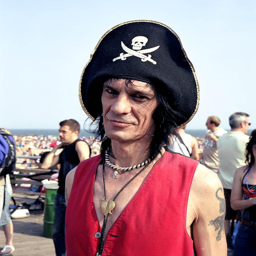

In [ ]:

 
# Opens a image in RGB mode
im = Image.open("/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg").resize((256,256))
im

<class 'numpy.ndarray'>


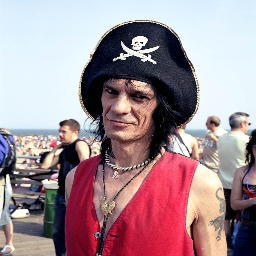

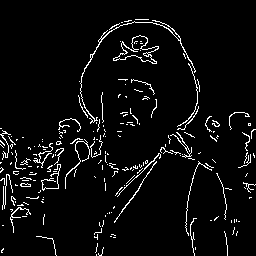

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg")  # Read image
img = cv2.resize(img,(256,256))
print(type(img))
cv2_imshow(img)
  
# # Setting parameter values
t_lower = 500  # Lower Threshold
t_upper = 600  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper) 
cv2_imshow(edge)


<class 'numpy.ndarray'>


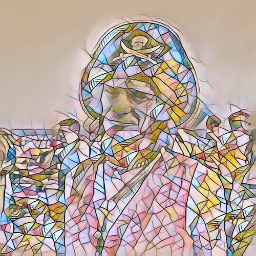

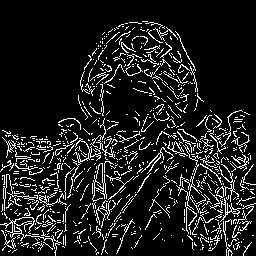

In [ ]:

img = cv2.imread("/content/drive/MyDrive/cv_project_fall_2022/data/output-images/000196.jpg")  # Read image
img = cv2.resize(img,(256,256))
print(type(img))
cv2_imshow(img)
  
# # Setting parameter values
t_lower = 500  # Lower Threshold
t_upper = 600  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper) 
cv2_imshow(edge)


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 19.8 MB/s 
     |████████████████████████████████| 182 kB 77.6 MB/s 


In [1]:
from google.colab import drive 
drive.mount('/content/drive')

import cv2
import torch
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
#model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)
midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
transform

Compose(
    <function transforms.<locals>.<lambda> at 0x7fbd5aaa9b80>
    <function transforms.<locals>.<lambda> at 0x7fbd5a7a5430>
)

In [ ]:
filename = "/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256,256))
import numpy as np
print(img.shape)
img = np.transpose(img, (2, 0, 1))
img = np.expand_dims(img,axis=0)
print(img.shape)
input_batch = torch.Tensor(img).to(device)
type(input_batch)
print(input_batch.shape)

(256, 256, 3)
(1, 3, 256, 256)
torch.Size([1, 3, 256, 256])


In [ ]:
prediction = midas(input_batch)


output = prediction.cpu().numpy()

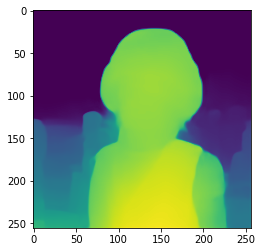

In [ ]:
plt.imshow(output[0])

In [ ]:
filename = "/content/drive/MyDrive/cv_project_fall_2022/data/output-images/000196.jpg"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

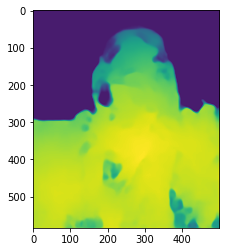

In [ ]:
plt.imshow(output)

## Downloading pre trained model

In [ ]:
# import os
# import argparse
# import zipfile
# from torch.hub import download_url_to_file

# PRETRAINED_MODELS_PATH = r'https://www.dropbox.com/s/fb39gscd1b42px1/pretrained_models.zip?dl=1'
# remote_resource_path = PRETRAINED_MODELS_PATH
# resource_tmp_path = '/content/drive/MyDrive/cv_project_fall_2022/models' + '.zip'
# download_url_to_file(remote_resource_path, resource_tmp_path)

# print(f'Started unzipping...')
# with zipfile.ZipFile(resource_tmp_path) as zf:
#     local_resource_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'models', 'binaries')
#     os.makedirs(local_resource_path, exist_ok=True)
#     zf.extractall(path=local_resource_path)
# print(f'Unzipping to: {local_resource_path} finished.')

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

import os
import torch
from torch.utils.data import DataLoader

import sys
sys.path.append('/content/drive/MyDrive/cv_project_fall_2022')

import utils.utils as utils
from models.definitions.transformer_net_new import TransformerNet

import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def stylize_static_image(inference_config):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Prepare the model - load the weights and put the model into evaluation mode
    stylization_model = TransformerNet().to(device)
    model_saved_path = inference_config['model_saved_path']
    #training_state = torch.load(os.path.join(inference_config["model_binaries_path"], inference_config["model_name"]))
    training_state = torch.load(model_saved_path)
    state_dict = training_state["state_dict"]
    stylization_model.load_state_dict(state_dict, strict=True)
    stylization_model.eval()

    if inference_config['verbose']:
        utils.print_model_metadata(training_state)

    content_img_path = inference_config['content_images_path'] #os.path.join(inference_config['content_images_path'], inference_config['content_input'])
    print(content_img_path)
    content_image_to_show = Image.open(content_img_path)
    plt.imshow(content_image_to_show)
    plt.show()

    style_image_path = inference_config['style_images_path']
    style_image_to_show = Image.open(style_image_path)
    plt.imshow(style_image_to_show)
    plt.show()

    with torch.no_grad():
        if os.path.isdir(inference_config['content_input']):  # do a batch stylization (every image in the directory)
            img_dataset = utils.SimpleDataset(inference_config['content_input'], inference_config['img_width'])
            img_loader = DataLoader(img_dataset, batch_size=inference_config['batch_size'])

            try:
                processed_imgs_cnt = 0
                for batch_id, img_batch in enumerate(img_loader):
                    processed_imgs_cnt += len(img_batch)
                    if inference_config['verbose']:
                        print(f'Processing batch {batch_id + 1} ({processed_imgs_cnt}/{len(img_dataset)} processed images).')

                    img_batch = img_batch.to(device)
                    stylized_imgs = stylization_model(img_batch).to('cpu').numpy()
                    for stylized_img in stylized_imgs:
                        utils.save_and_maybe_display_image(inference_config, stylized_img, should_display=False)
            except Exception as e:
                print(e)
                print(f'Consider making the batch_size (current = {inference_config["batch_size"]} images) or img_width (current = {inference_config["img_width"]} px) smaller')
                exit(1)

        else:  # do stylization for a single image
            #content_img_path = os.path.join(inference_config['content_images_path'], inference_config['content_input'])
            transform_list = [transforms.ToTensor()]
            transform = transforms.Compose(transform_list)
            
            target_transform_list = [transforms.ToTensor(), transforms.GaussianBlur(kernel_size=(51, 51), sigma=(70, 70))]
            #target_transform_list = [transforms.ToTensor(), transforms.GaussianBlur(kernel_size=(21, 21), sigma=(50, 50))]
            transform_target = transforms.Compose(target_transform_list)
            
            img = utils.load_image(content_img_path, target_shape=inference_config['img_width'])
            img = transform(img).to(device)

            
            face_masked_image_batch = utils.load_image(inference_config['content_images_mask_path'], target_shape=inference_config['img_width'], RGB=False)
            face_masked_image_batch = transform_target(face_masked_image_batch).to(device)
            face_masked_image_batch = face_masked_image_batch * 0.03

            result = torch.cat([img, face_masked_image_batch], dim=0)

            print(' Infering...')
            print(img.shape)
            content_image = result.repeat(1, 1, 1, 1)
            print(content_image.shape)
            print(' Infering Ends...')
            #content_image = utils.prepare_img(content_img_path, inference_config['img_width'], device)
            stylized_img = stylization_model(content_image).to('cpu').numpy()[0]
            
            
            
            utils.save_and_maybe_display_image(inference_config, stylized_img, should_display=inference_config['should_not_display'])


In [8]:
content_images_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'data', 'content-images')
output_images_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'data', 'output-images')
model_binaries_path = os.path.join('/content/drive/MyDrive/cv_project_fall_2022', 'models', 'binaries')

assert utils.dir_contains_only_models(model_binaries_path), f'Model directory should contain only model binaries.'
os.makedirs(output_images_path, exist_ok=True)

#
# Modifiable args - feel free to play with these
#
# parser = argparse.ArgumentParser()
# # Put image name or directory containing images (if you'd like to do a batch stylization on all those images)
# parser.add_argument("--content_input", type=str, help="Content image(s) to stylize", default='taj_mahal.jpg')
# parser.add_argument("--batch_size", type=int, help="Batch size used only if you set content_input to a directory", default=5)
# parser.add_argument("--img_width", type=int, help="Resize content image to this width", default=500)
# parser.add_argument("--model_name", type=str, help="Model binary to use for stylization", default='mosaic_4e5_e2.pth')

# # Less frequently used arguments
# parser.add_argument("--should_not_display", action='store_false', help="Should display the stylized result")
# parser.add_argument("--verbose", action='store_true', help="Print model metadata (how the model was trained) and where the resulting stylized image was saved")
# parser.add_argument("--redirected_output", type=str, help="Overwrite default output dir. Useful when this project is used as a submodule", default=None)
# args = parser.parse_args()

# # if redirected output is not set when doing batch stylization set to default image output location
# if os.path.isdir(args.content_input) and args.redirected_output is None:
#     args.redirected_output = output_images_path

# Wrapping inference configuration into a dictionary
def get_mask_path(file_path):
    file_name = file_path.split('/')[-1]
    file_name_split = file_name.split('_')
    dir_name = file_name_split[0] + '--' + file_name_split[1]
    return file_path.replace("/test_images/", "/data/widerface/WIDER_train/masks/" + dir_name + "/")

inference_config = dict()


inference_config['content_input'] = 'lion.jpg'
inference_config['batch_size'] = 5
inference_config['img_width'] = 500

inference_config['model_name'] = 'mosaic_4e5_e2.pth'
inference_config['style_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/data/style-images/mosaic.jpg'
# 1st conv layer
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_content_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_9_batch_1899.pth'
# 3rd conv layer
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_content_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
# 1st conv layer
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_1st_layer_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

# 2nd conv layer
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_1st_layer_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

# 2nd conv layer - using content and style loss of layer 2
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/ckpt_style_face_layer_2_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
#inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/mosaic/ckpt_style_face_layer_2_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

#inference_config['model_saved_path'] = "/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_3rd_layer_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth"


#inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/edtaonisl/ckpt_style_face_edtaonisl_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'

    
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/mosaic/ckpt_style_depth_face_edge_layer_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_3_batch_1899.pth'
inference_config['model_saved_path'] = '/content/drive/MyDrive/cv_project_fall_2022/models/checkpoints/mosaic/ckpt_style_face_edge_only_new_mosaic_cw_1.0_sw_400000.0_tw_0_epoch_6_batch_1899.pth'



#inference_config['model_saved_path']

inference_config['should_not_display'] = True
inference_config['verbose'] = True
# inference_config['redirected_output'] = True

# inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/data/widerface/WIDER_train/images/0--Parade/0_Parade_marchingband_1_641.jpg'
inference_config['output_images_path'] = output_images_path
inference_config['model_binaries_path'] = model_binaries_path
inference_config['redirected_output'] = output_images_path

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg'
inference_config['content_images_mask_path'] = get_mask_path(inference_config['content_images_path'])
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_marchingband_1_1031.jpg'
inference_config['content_images_mask_path'] = get_mask_path(inference_config['content_images_path'])
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_904.jpg'
inference_config['content_images_mask_path'] = get_mask_path(inference_config['content_images_path'])
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_36.jpg'
inference_config['content_images_mask_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/data/widerface/WIDER_train/masks/8--Election_Campain/8_Election_Campain_Election_Campaign_8_36.jpg' 
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/8_Election_Campain_Election_Campaign_8_138.jpg'
inference_config['content_images_mask_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/data/widerface/WIDER_train/masks/8--Election_Campain/8_Election_Campain_Election_Campaign_8_138.jpg' 
stylize_static_image(inference_config)

inference_config['content_images_path'] = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/19_Couple_Couple_19_940.jpg'
inference_config['content_images_mask_path'] = get_mask_path(inference_config['content_images_path'])
stylize_static_image(inference_config)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import face_mask

In [ ]:
# https://github.com/onnx/models#body_analysis

In [ ]:
# https://www.analyticsvidhya.com/blog/2018/07/top-10-pretrained-models-get-started-deep-learning-part-1-computer-vision/

In [ ]:
# https://modelzoo.co/

In [ ]:
# https://github.com/topics/face-segmentation

In [ ]:
file_path = '/content/drive/MyDrive/cv_project_fall_2022/face_mask/test_images/0_Parade_Parade_0_467.jpg'
file_name = file_path.split('/')[-1]
file_name_split = file_name.split('_')
dir_name = file_name_split[0] + '--' + file_name_split[1]
file_path.replace("/test_images/", "/data/widerface/WIDER_train/masks/" + dir_name + "/" + file_name)

'/content/drive/MyDrive/cv_project_fall_2022/face_mask/data/widerface/WIDER_train/masks/0--Parade/0_Parade_Parade_0_467.jpg0_Parade_Parade_0_467.jpg'

error: ignored